# Notebook for statistical  and time series analysis of the dataset "NYC Yellow Taxi Trip Data" 

### Install the required packages, lunch this cell only once (code 1)


In [14]:
%pip install kagglehub
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn
%pip install folium 
%pip install scipy
%pip install -U jupyter ipywidgets
%pip install -U jupyterlab-widgets
import seaborn as sns
from scipy.stats import norm, alpha
import numpy as np
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, MarkerCluster
from datetime import datetime
from scipy.stats import probplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

## Download the dataset and load the data
##### lunch this cell only once (code 2)

In [ ]:
# Download latest version
path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
# print("Path to dataset files:", path) use only for debug
file_path1 = os.path.join(path, "yellow_tripdata_2015-01.csv")  # Path to the dataset file
file_path2 = os.path.join(path, "yellow_tripdata_2016-01.csv")  # Path to the dataset file
file_path3 = os.path.join(path, "yellow_tripdata_2016-02.csv")  # Path to the dataset file
file_path4 = os.path.join(path, "yellow_tripdata_2016-03.csv")  # Path to the dataset file

#### there is un error in un colum, so you must run this script for  update and change the column name in first dataset (if you need this column)  (code 3)

In [ ]:
def update_and_change(file_path):
    df = pd.read_csv(file_path)
    # Update the column name
    if 'RateCodeID' in df.columns:
        df.rename(columns={'RateCodeID': 'RatecodeID'}, inplace=True)
    return df

df_2015_01 = update_and_change(file_path1)

#####  Check if database was imported correctly, this script is optional will be used only for debug (code 4)

In [ ]:
# Check if the file exists
if os.path.exists(file_path1):
    # upload the file to the notebook
    df = pd.read_csv(file_path1)

    # Print the colum names
    print("Nomi delle colonne nel dataset:", df.columns.tolist())
else:
    print(f"Il file non esiste. Controlla il percorso: {file_path1}")


### Statistical analysis in colum VendorID for the dataset

##### Union of the dataset and creation of the bar plot for the frequency of the VendorID (code 5)

In [ ]:
#! before run this you must run the code 1 and 2
vendor_colum = ['VendorID']
df_2015_01 = pd.read_csv(file_path1, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=vendor_colum)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=vendor_colum)    # Load the dataset  in a DataFrame
print("Number of rows in the dataset 2015-01:", len(df_2015_01))
print("Number of rows in the dataset 2016-01:", len(df_2016_01))
print("Number of rows in the dataset 2016-02:", len(df_2016_02))
print("Number of rows in the dataset 2016-03:", len(df_2016_03))

# Concatenate the dataframes
df = pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

#### Creation of the bar plot  and pie cacke for the frequency of the VendorID (code 6)

In [ ]:

# set a default style 
plt.style.use('default')

# calculate frequenzy of 
fr_vendor = df['VendorID'].value_counts()

# Creazione del grafico a barre con annotazioni e sfondo bianco
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')  # Impostiamo il colore di sfondo della figura
ax.set_facecolor('white')  # Impostiamo il colore di sfondo dell'area del grafico

# Creazione del grafico a barre
fr_vendor.plot(kind='bar', color=['#1f77b4', '#2ca02c'], ax=ax)

# Aggiunta di annotazioni numeriche per ogni barra
for i, count in enumerate(fr_vendor):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Aggiunta di titolo e etichette
ax.set_title("Frequency of VendorID", fontsize=14, fontweight='bold')
ax.set_xlabel("VendorID", fontsize=12)
ax.set_ylabel("Number of trips", fontsize=12)
ax.set_xticks(range(len(fr_vendor.index)))
ax.set_xticklabels(fr_vendor.index, rotation=0)

# Visualizzazione del grafico a barre
plt.show()

# Creazione del grafico a torta con percentuali e conteggi, sfondo bianco
plt.figure(figsize=(8, 8), facecolor='white')  # Impostiamo il colore di sfondo della figura
fr_vendor.plot(kind='pie', 
               autopct=lambda p: f'{p:.1f}% ({int(p * fr_vendor.sum() / 100)})',  # Percentuali con conteggi
               colors=['#1f77b4', '#2ca02c'], 
               startangle=90, 
               counterclock=False, 
               wedgeprops=dict(width=0.3))  # Differenziazione dello stile con spessore

# Aggiunta di titolo
plt.title("Percentage of trips by VendorID", fontsize=14, fontweight='bold')

# Visualizzazione del grafico a torta
plt.show()


### Analysis of the distribution of the trips by hour (code 7)

In [ ]:
#! before run this you must run the code 1 and 2 and 3
# union in a single csv only with the column RateCodeID
colum_rate = ['RatecodeID'] 
df_2015_01_filtered = df_2015_01[['RatecodeID']]    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_02 = pd.read_csv(file_path3, usecols=colum_rate)    # Load the dataset  in a DataFrame
df_2016_03 = pd.read_csv(file_path4, usecols=colum_rate)    # Load the dataset  in a DataFrame
df=pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)



Creation of the bar plot for the frequency of the RateCodeID (code 8)

In [ ]:
# Creation of the bar plot for the frequency of the RateCodeID
df['Validity_RateCodeID'] = df['RatecodeID'].apply(lambda x: 'valid' if x in range(1, 7) else 'not valid')

# Filter the valid RateCodeID
ratecode_validi = df[df['Validity_RateCodeID'] == 'valid']['RatecodeID']

# Calculate the frequency of the RateCodeID
frequent_rate_id = ratecode_validi.value_counts()
frequent_rate_id['not valid'] = df['Validity_RateCodeID'].value_counts().get('not valid', 0)

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = frequent_rate_id.plot(kind='bar', color=['skyblue' if idx != 'not valid' else 'salmon' for idx in frequent_rate_id.index])

# Add title and labels
plt.title("Frequenza dei Codici Tariffari (RatecodeID)")
plt.xlabel("RatecodeID")
plt.ylabel("Numero di corse")
plt.xticks(rotation=0)

# Add annotations for each bar
for i, count in enumerate(frequent_rate_id):
    ax.text(i, count + max(frequent_rate_id) * 0.01, str(count), ha='center', va='bottom', fontsize=10)

# Show the bar plot
plt.show()

# add a pie chart for the % of the RateCodeID
plt.figure(figsize=(8, 8), facecolor='white')  
frequent_rate_id.plot(kind='pie', 
                      autopct=lambda p: f'{p:.1f}% ({int(p * frequent_rate_id.sum() / 100)})',
                      colors=['skyblue' if idx != 'Non valido' else 'salmon' for idx in frequent_rate_id.index], 
                      startangle=90, 
                      counterclock=False, 
                      wedgeprops=dict(width=0.3))  

plt.title("Percentuale delle corse per RatecodeID", fontsize=14, fontweight='bold')
plt.show()

print(frequent_rate_id)

tpep_pickup_datetime
1     1441242
2     1428476
3     1509792
4     1473883
5     1567420
6     1546428
7     1516448
8     1558979
9     1606335
10    1667339
11    1618774
12    1640191
13    1659034
14    1625521
15    1586189
16    1652009
17    1642669
18    1615880
19    1590963
20    1602113
21    1547590
22    1585777
23    1328102
24    1427361
25    1503061
26    1399607
27    1281192
28    1474407
29    1572218
30    1304218
31    1275627
Name: count, dtype: int64
hour
0     1691459
1     1246344
2      918449
3      689141
4      513887
5      477293
6     1034368
7     1756976
8     2154883
9     2173883
10    2107207
11    2191108
12    2327988
13    2325819
14    2428242
15    2390529
16    2156376
17    2524604
18    2986286
19    2976744
20    2748153
21    2683741
22    2565133
23    2180232
Name: count, dtype: int64


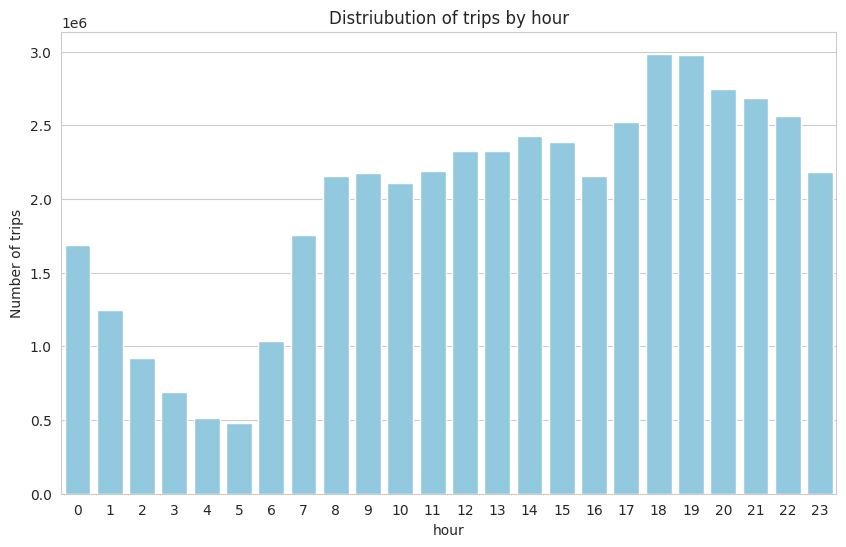

In [22]:
colum = ['tpep_pickup_datetime'] 
df_2015_01_filtered = pd.read_csv(file_path1, usecols=colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum)     
df_2016_02 = pd.read_csv(file_path3, usecols=colum)
df_2016_03 = pd.read_csv(file_path4, usecols=colum)

df_total = pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

# convert the column to datetime
df_total['tpep_pickup_datetime'] = pd.to_datetime(df_total['tpep_pickup_datetime'])

# extract the hour from the datetime
df_total['hour'] = df_total['tpep_pickup_datetime'].dt.hour

#couht the frequency of each hour
hour_freq = df_total['hour'].value_counts().sort_index()

# create array with the hours
hours=hour_freq.index
counts=hour_freq.values


#print frequency of each hour
print(hour_freq)

#plot for hour distribution of trips
plt.figure(figsize=(10, 6))
sns.barplot(x=hours, y=counts, color='skyblue')
plt.title("Distriubution of trips by hour")
plt.xlabel("hour")
plt.ylabel("Number of trips")
plt.xticks(np.arange(0, 24, 1))
plt.show()


### Analysis of the distribution of the trips by hour in a day

    hour     avg_count
0      0  13864.418033
1      1  10215.934426
2      2   7528.270492
3      3   5648.696721
4      4   4212.188525
5      5   3912.237705
6      6   8478.426230
7      7  14401.442623
8      8  17662.975410
9      9  17818.713115
10    10  17272.188525
11    11  17959.901639
12    12  19081.868852
13    13  19064.090164
14    14  19903.622951
15    15  19594.500000
16    16  17675.213115
17    17  20693.475410
18    18  24477.754098
19    19  24399.540984
20    20  22525.844262
21    21  21997.877049
22    22  21025.680328
23    23  17870.754098


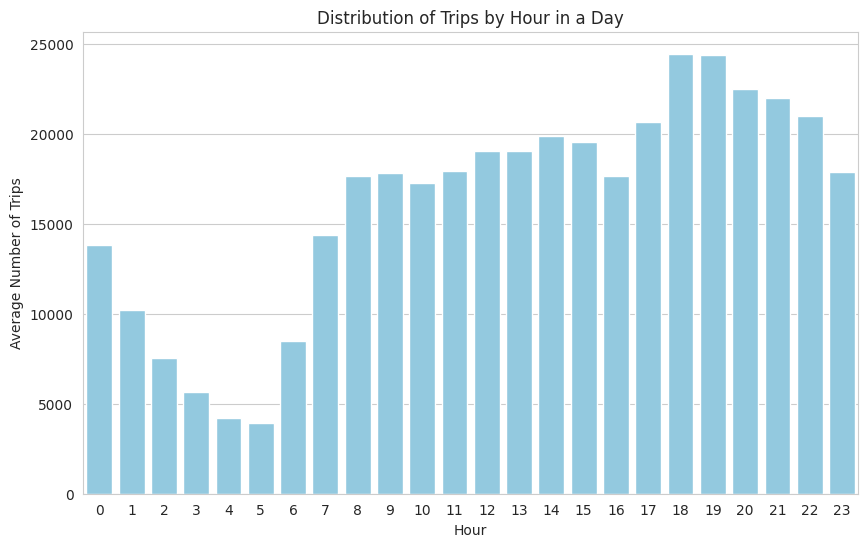

Giorni trovati nel dataset:
2015-01-01
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-17
2015-01-18
2015-01-19
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-24
2015-01-25
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-01-31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-16
2016-01-17
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-23
2016-01-24
2016-01-25
2016-01-26
2016-01-27
2016-01-28
2016-01-29
2016-01-30
2016-01-31
2016-02-01
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-06
2016-02-07
2016-02-08
2016-02-09
2016-02-10
2016-02-11
2016-02-12
2016-02-13
2016-02-14
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-20
2016-02-21
2016-02-22
2016-02-23
2016-02-24
2016-02-25
2016-02-26
2016

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colum = ['tpep_pickup_datetime']  # scelgo la colonna tpep_pickup_datetime
df_2015_01_filtered = pd.read_csv(file_path1, usecols=colum)
df_2016_01 = pd.read_csv(file_path2, usecols=colum)
df_2016_02 = pd.read_csv(file_path3, usecols=colum)
df_2016_03 = pd.read_csv(file_path4, usecols=colum)

df_total = pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

df_total['tpep_pickup_datetime'] = pd.to_datetime(df_total['tpep_pickup_datetime'])

df_total['day'] = df_total['tpep_pickup_datetime'].dt.date
df_total['hour'] = df_total['tpep_pickup_datetime'].dt.hour

hourly_day_freq = df_total.groupby(['day', 'hour']).size().reset_index(name='count')

avg_hourly_by_day = hourly_day_freq.groupby('hour')['count'].mean().reset_index(name='avg_count')

print(avg_hourly_by_day)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_hourly_by_day['hour'], y=avg_hourly_by_day['avg_count'], color='skyblue')
plt.title("Distribution of Trips by Hour in a Day")
plt.xlabel("Hour")
plt.ylabel("Average Number of Trips")
plt.xticks(np.arange(0, 24, 1))
plt.show()
unique_days = df_total['day'].unique()

unique_days_sorted = np.sort(unique_days)

print("Giorni trovati nel dataset:")
for day in unique_days_sorted:
    print(day)

### Try to fit the distribution of the trips by hour with a Gaussian distribution (code 9)


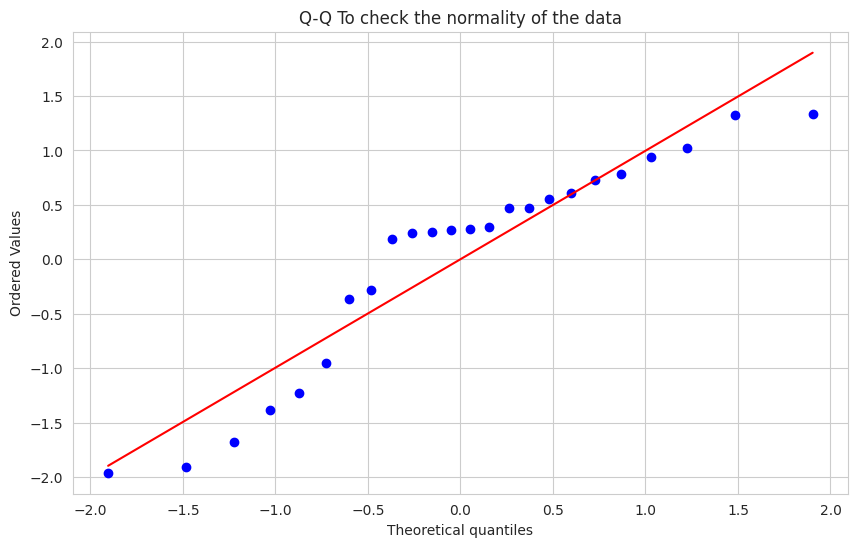

In [20]:
hour_freq = df_total['hour'].value_counts().sort_index()

# 1. Standardizzazione dei dati
mean = hour_freq.mean()  # Calculate the mean
std = hour_freq.std()    # Deviazione standard for frequency of trips
# This process can traform the data for have a media of 0 and a standard deviation of 1


hour_freq_standardized = (hour_freq - mean) / std # Standardizzazione of the frequency of trips

# 2. Q-Q Plot for check the normality of the data
# Q-Q Plot (Quantile-Quantile Plot) compares the quantiles of your observed data (in this case, hour_freq_standardized) with the quantiles of a theoretical normal distribution.
# If your data follows a normal distribution:
# The Q-Q Plot points line up along the red diagonal line (representing the theoretical values of a standardized normal).
# If the data deviate from the diagonal line:
# Indicates that the data do not follow a normal distribution.
# The further the points are from the diagonal line, the more the data deviate from a normal distribution.
plt.figure(figsize=(10, 6))
probplot(hour_freq_standardized, dist="norm", plot=plt)
plt.title("Q-Q To check the normality of the data")
plt.grid(True)
plt.show()

#### Calculate the mean and the standard deviation of the distribution of the trips by hour (code 9)

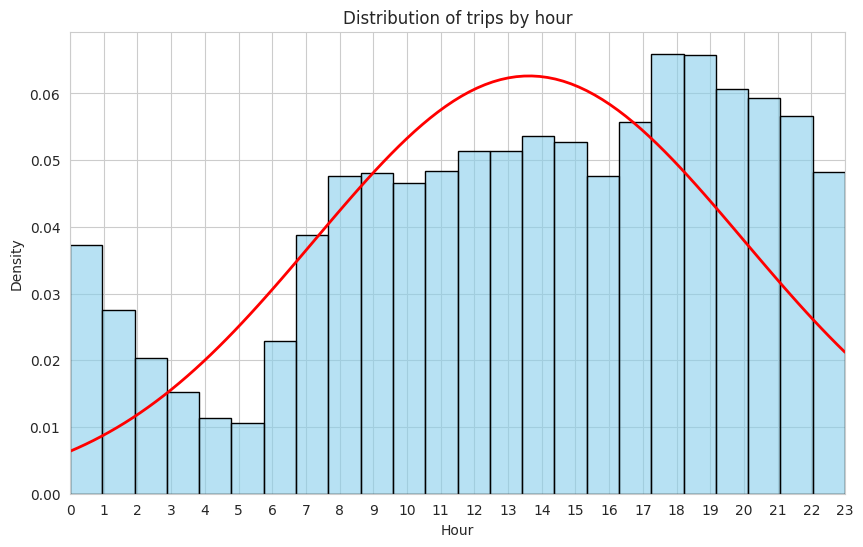

In [17]:

mu, std = norm.fit(df_total['hour'])

# create the gaussian distribution
xmin,xmax=0,23
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(10, 6))
plt.plot(x,p,'r-', lw=2 ,label='Gaussian fit' ) # Gaussian fit
sns.histplot(df_total['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False,alpha=0.6)
#order the x axis and put the center of gayssian distribution in the middle
plt.xlim(xmin,xmax)
plt.title("Distribution of trips by hour")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.xticks(np.arange(0, 24, 1))
plt.show()
# plt.legend()

#### barplot follow median and standard deviation (code 10)

In [ ]:
#! before run this you must run the code 1 and 2
colum = ['tpep_pickup_datetime'] # scelgo la colonna tpep_pickup_datetime
df_2015_01_filtered = pd.read_csv(file_path1, usecols=colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum)     
df_2016_02 = pd.read_csv(file_path3, usecols=colum)
df_2016_03 = pd.read_csv(file_path4, usecols=colum)

df_total = pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

# convert the column to datetime
df_total['tpep_pickup_datetime'] = pd.to_datetime(df_total['tpep_pickup_datetime'])

# extract the hour from the datetime
df_total['hour'] = df_total['tpep_pickup_datetime'].dt.hour
# Calcola la media e la deviazione standard
mu = df_total['hour'].mean()
std = df_total['hour'].std()

# Definisce i limiti dell'asse x e calcola la distribuzione normale
xmin, xmax = 0, 23
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(x, p, 'r-', lw=2, label='Distribuzione Gaussiana')  # Curva gaussiana
sns.histplot(df_total['hour'], bins=24, color='skyblue', edgecolor='black', stat='density', kde=False, alpha=0.6)

# Aggiunge la media e la deviazione standard al grafico
plt.axvline(mu, color='blue', linestyle='--', linewidth=1, label=f'Media: {mu:.2f}')
plt.axvline(mu + std, color='green', linestyle='--', linewidth=1, label=f'Media + 1σ: {mu + std:.2f}')
plt.axvline(mu - std, color='green', linestyle='--', linewidth=1, label=f'Media - 1σ: {mu - std:.2f}')

# Aggiunge titolo e etichette
plt.title("Distribuzione oraria delle corse dei taxi")
plt.xlabel("Ora del giorno")
plt.ylabel("Densità (frequenza normalizzata)")
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.show()
plt.show()

La media delle ore è: 13:37
La mediana delle ore è: 14:00


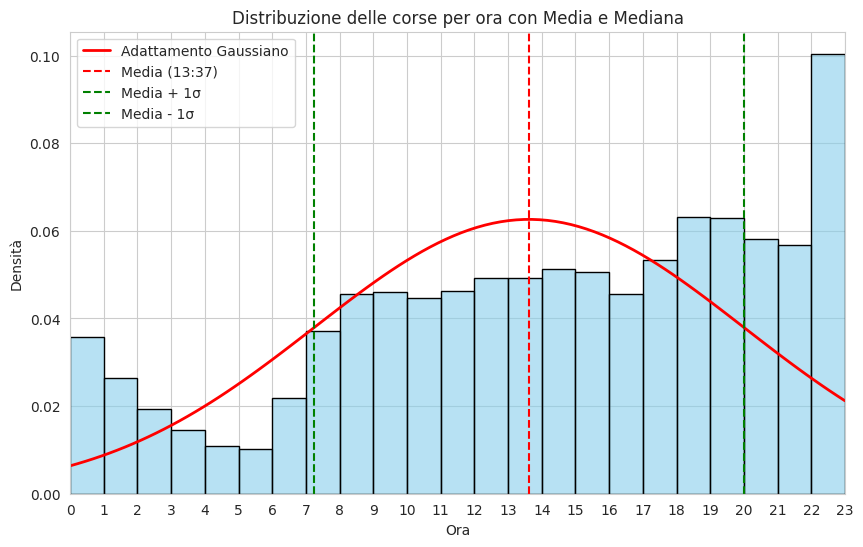

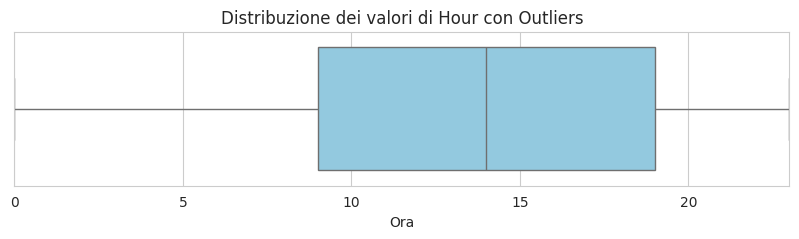

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

colum = ['tpep_pickup_datetime'] # scelgo la colonna tpep_pickup_datetime
df_2015_01_filtered = pd.read_csv(file_path1, usecols=colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum)     
df_2016_02 = pd.read_csv(file_path3, usecols=colum)
df_2016_03 = pd.read_csv(file_path4, usecols=colum)

df_total = pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

# convert the column to datetime
df_total['tpep_pickup_datetime'] = pd.to_datetime(df_total['tpep_pickup_datetime'])

# extract the hour from the datetime
df_total['hour'] = df_total['tpep_pickup_datetime'].dt.hour
# Calcolare la media e la mediana delle ore
mu_decimal = df_total['hour'].mean()
median_hour = df_total['hour'].median()
sigma = df_total['hour'].std()

# Convertire la media decimale in formato HH:MM
hours = int(mu_decimal)
minutes = int((mu_decimal - hours) * 60)

# Stampare media e mediana
print(f"La media delle ore è: {hours}:{minutes:02d}")
print(f"La mediana delle ore è: {int(median_hour)}:00")

# Ordinare i valori per distanza dalla media
df_total['distance_from_mean'] = np.abs(df_total['hour'] - mu_decimal)
df_sorted = df_total.sort_values('distance_from_mean')

# Plot della distribuzione con media e mediana
xmin, xmax = 0, 23
x = np.linspace(xmin, xmax, 100)
gaussian_curve = norm.pdf(x, mu_decimal, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_curve, 'r-', lw=2, label='Adattamento Gaussiano')  # Adattamento Gaussiano

# Creare l'istogramma con binwidth=1 per ogni ora
sns.histplot(df_sorted['hour'], binwidth=1, color='skyblue', edgecolor='black', stat='density', kde=False, alpha=0.6)

# Linee per la media, mediana e deviazione standard
plt.axvline(mu_decimal, color='red', linestyle='--', label=f'Media ({hours}:{minutes:02d})')
plt.axvline(mu_decimal + sigma, color='green', linestyle='--', label='Media + 1σ')
plt.axvline(mu_decimal - sigma, color='green', linestyle='--', label='Media - 1σ')

# Titoli e legende
plt.title("Distribuzione delle corse per ora con Media e Mediana")
plt.xlabel("Ora")
plt.ylabel("Densità")
plt.xticks(np.arange(0, 24, 1))
plt.xlim(xmin, xmax)  # Imposta il limite dell'asse x per centrarlo correttamente
plt.legend()
plt.show()

# Visualizzazione outliers con boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_total['hour'], color='skyblue')
plt.title("Distribuzione dei valori di Hour con Outliers")
plt.xlabel("Ora")
plt.xlim(xmin, xmax)  # Imposta il limite dell'asse x per centrarlo correttamente nel boxplot
plt.show()


In [ ]:
colum = ['tpep_pickup_datetime'] # scelgo la colonna tpep_pickup_datetime
df_2015_01_filtered = pd.read_csv(file_path1, usecols=colum)    # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=colum)     
df_2016_02 = pd.read_csv(file_path3, usecols=colum)
df_2016_03 = pd.read_csv(file_path4, usecols=colum)

df_total = pd.concat([df_2015_01_filtered, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

# convert the column to datetime
df_total['tpep_pickup_datetime'] = pd.to_datetime(df_total['tpep_pickup_datetime'])

# extract the hour from the datetime
df_total['hour'] = df_total['tpep_pickup_datetime'].dt.hour
#calculate trip for hour
hour_freq = df_total['hour'].value_counts().sort_index()
#plot for hour distribution of trips
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_freq.index, y=hour_freq.values, color='skyblue')
plt.title("Distriubution of trips by hour")
plt.xlabel("hour")
plt.ylabel("Number of trips")
plt.xticks(np.arange(0, 24, 1))
plt.show()

### anlaisys on  drip distance (code 11)

In [ ]:
#! before run this you must run the code 1 and 2

plt.style.use('default')  
sns.set_theme(style="white")  # Set the style of the plots

# Load the dataset in a DataFrame
columns=['trip_distance']
df_2015_01 = pd.read_csv(file_path1, usecols=columns)   # Load the dataset  in a DataFrame  
df_2016_01 = pd.read_csv(file_path2, usecols=columns)
df_2016_02 = pd.read_csv(file_path3, usecols=columns)
df_2016_03 = pd.read_csv(file_path4, usecols=columns)

# Filter date with trip distance between 0 and 100 miles
df_total = pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)
df_total_filtered = df_total[(df_total['trip_distance'] > 0) & (df_total['trip_distance'] <= 40)]

# Calculate the mean and standard deviation of the distribution
mu, std = norm.fit(df_total_filtered['trip_distance'])

# Create the Gaussian distribution
x = np.linspace(0, 40, 80)
p = norm.pdf(x, mu, std)        # Gaussian distribution

# Plot the histogram and the Gaussian distribution
plt.figure(figsize=(14, 8))
sns.histplot(df_total_filtered['trip_distance'], bins=40, color='skyblue', edgecolor='black', stat='density', kde=False, alpha=0.6)
plt.plot(x, p, 'r-', lw=2, label=f'Gaussian fit (μ={mu:.2f}, σ={std:.2f})')  # Curve of the Gaussian distribution
plt.title("Distribuzione delle distanze dei viaggi (fino a 20 miglia)")
plt.xlabel("Distanza del viaggio (miglia)")
plt.ylabel("Densità")
plt.legend()
plt.show()

### Analysis of the distribution of the trip duration by the hours (code 12)

In [ ]:
#! before run this you must run the code 1, 2  and 3
# #unite all dataset in a single csv
file_paths=[file_path2, file_path3, file_path4]
def load_columns(file_paths, columns_envolved):
    df_list = []
    for file_path in file_paths:
        # load only the columns of interest
        df = pd.read_csv(file_path, usecols=columns_envolved)
        # correct the name of the column RateCodeID
        # df = df[df['RatecodeID'].isin([1, 6])]
        if 'RateCodeID' in df.columns:
            df.rename(columns={'RateCodeID': 'RatecodeID'}, inplace=True)
        df_list.append(df)
    # unite all the dataframes
    return pd.concat(df_list, ignore_index=True)
df_distance = load_columns(file_paths, columns_envolved=['trip_distance'])
df_time_fase = load_columns(file_paths, columns_envolved=['trip_distance', 'tpep_pickup_datetime'])

In [ ]:
# 3. Cluster the data by the hour
#df_ratecode_parzial = load_colums(file_paths, colums_envolved=['trip_distance', 'RatecodeID'])
#filter ratecodeID between 0 and 6

df_ratecode_parzial = load_columns(file_paths, columns_envolved=['trip_distance', 'RatecodeID', 'tpep_pickup_datetime'])
df_2015_01_filtered = df_2015_01[['trip_distance', 'RatecodeID', 'tpep_pickup_datetime']]    # Load the dataset  in a DataFrame
df_ratecode=pd.concat([df_2015_01_filtered, df_ratecode_parzial], ignore_index=True)
# convert the column to datetime
df_ratecode['tpep_pickup_datetime'] = pd.to_datetime(df_ratecode_parzial['tpep_pickup_datetime'])
df_ratecode['pickup_hour'] = df_ratecode['tpep_pickup_datetime'].dt.hour

# Calculate the number of trips for each hour
trip_for_hour = df_ratecode.groupby('pickup_hour').size()

### code 13

In [ ]:
#! before run this you must run the code 1, 2 ,3 and 12

distance_media_for_hour = df_ratecode.groupby('pickup_hour')['trip_distance'].mean()

# Plot the number of trips and the average distance for each hour
plt.figure(figsize=(12, 6))

# Number of trips for each hour
plt.subplot(2, 1, 1)
trip_for_hour.plot(kind='bar', color='skyblue')
plt.title('Numero di Viaggi per Ora')
plt.xlabel('Ora del Giorno')
plt.ylabel('Numero di Viaggi')
plt.xticks(rotation=0)

# Distance for each hour
plt.subplot(2, 1, 2)
distance_media_for_hour.plot(kind='line', marker='o', color='orange')
plt.title('Distanza Media per Ora')
plt.xlabel('Ora del Giorno')
plt.ylabel('Distanza Media del Viaggio')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Crete realtions with ratecode and trip distance (code 14)

### map of the trips (code 15)
# exercise with folium

In [ ]:
columns_needed = [
    'tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude'
]

df_2015_01 = pd.read_csv(file_path1, usecols=columns_needed)   # Load the dataset  in a DataFrame
df_2016_01 = pd.read_csv(file_path2, usecols=columns_needed)
df_2016_02 = pd.read_csv(file_path3, usecols=columns_needed)
df_2016_03 = pd.read_csv(file_path4, usecols=columns_needed)
#concate all the dataframes
df= pd.concat([df_2015_01, df_2016_01, df_2016_02, df_2016_03], ignore_index=True)

#convert the column to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# define the period of the day
def get_hour_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# create a column for the pickup period
df['pickup_period'] = df['tpep_pickup_datetime'].dt.hour.apply(get_hour_period)

# Filter the data only for the morning period
df = df[(df['pickup_latitude'] != 0) & (df['pickup_longitude'] != 0) &
        (df['dropoff_latitude'] != 0) & (df['dropoff_longitude'] != 0)]


In [ ]:
# Create the map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add a cluster to group the points
marker_cluster = MarkerCluster().add_to(nyc_map)

# Group the most frequent routes
for period in df['pickup_period'].unique():
    period_data = df[df['pickup_period'] == period]
    #   Group the most frequent routes
    frequent_routes = period_data.groupby(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']).size().reset_index(name='counts')
    top_routes = frequent_routes.nlargest(40, 'counts') 
    
    # Add the routes, the start and end markers on the map
    for _, row in top_routes.iterrows():
        folium.PolyLine(
            locations=[(row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])],
            color='blue' if period == 'morning' else 'green' if period == 'afternoon' else 'orange' if period == 'evening' else 'purple',
            weight=20,
            opacity=1  
        ).add_to(marker_cluster)


# Show the map
nyc_map

### Antoher tipe of maps (code 16) Clusterizzazione per Tratte

In [ ]:
# Filter only the data for the morning
morning_data = df[df['pickup_period'] == 'morning']

# create a map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# add a cluster to group the points
marker_cluster = MarkerCluster().add_to(nyc_map)

# gruop the most frequent routes
frequent_routes = morning_data.groupby(
    ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
).size().reset_index(name='counts')
top_routes = frequent_routes.nlargest(40, 'counts')  # Prendiamo le 40 tratte più comuni

# add the routes, the start and end markers on the map
for _, row in top_routes.iterrows():
    # trip
    folium.PolyLine(
        locations=[
            (row['pickup_latitude'], row['pickup_longitude']),
            (row['dropoff_latitude'], row['dropoff_longitude'])
        ],
        color='blue',  # Colore per il tragitto
        weight=5,      # Spessore della linea
        opacity=0.7    # Opacità per il tragitto
    ).add_to(marker_cluster)

    # Marker pickup
    folium.Marker(
        location=(row['pickup_latitude'], row['pickup_longitude']),
        icon=folium.Icon(color='blue', icon='play', prefix='fa'),  # Icona per identificare il punto di partenza
        popup='Partenza'
    ).add_to(marker_cluster)

    # Marker dropoff
    folium.Marker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        icon=folium.Icon(color='red', icon='flag', prefix='fa'),  # Icona per identificare il punto di arrivo
        popup='Arrivo'
    ).add_to(marker_cluster)

# Visualizza la mappa
nyc_map
# todo: problem whit association of the points

### Data visualizazion ten most pick up e drop off points (code 17)

In [ ]:
# Filter only the data for the morning
morning_data = df[df['pickup_period'] == 'morning']

# Find the 10 most frequent pickup points
top_pickups = morning_data.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='counts')
top_pickups = top_pickups.nlargest(10, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Find the 10 most frequent dropoff points
top_dropoffs = morning_data.groupby(['dropoff_latitude', 'dropoff_longitude']).size().reset_index(name='counts')
top_dropoffs = top_dropoffs.nlargest(10, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Create the map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Cluster for pickup and dropoff points (is not important in ten most pick up and drop off points)
pickup_cluster = MarkerCluster(name='Top 10 Pickup Points - Morning').add_to(nyc_map)
dropoff_cluster = MarkerCluster(name='Top 10 Dropoff Points - Morning').add_to(nyc_map)

# Add the pickup points with explicit index
f=0
for index, row in top_pickups.iterrows():
    f += 1  # Incrementa f
    folium.Marker(
        location=(row['pickup_latitude'], row['pickup_longitude']),
        icon=folium.Icon(color='blue', icon='play', prefix='fa'),
        popup=f'Questo è il numero {f} di punti di partenza (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(pickup_cluster)

# Add the dropoff points with explicit index
k = 0  
for index, row in top_dropoffs.iterrows():
    k += 1  # increments k
    folium.Marker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        icon=folium.Icon(color='red', icon='flag', prefix='fa'),
        popup=f'Questo è il numero {k} di punti di arrivo (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(dropoff_cluster)

# add a layer control
folium.LayerControl().add_to(nyc_map)

# show the map
nyc_map
#!!!!!! todo:  problem with the zoom of map

### Clusterinf big data visualization (code 17)

In [ ]:
# Filter only the data for the morning
morning_data = df[df['pickup_period'] == 'morning']

# Find the 100 most frequent pickup points
top_pickups = morning_data.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='counts')
top_pickups = top_pickups.nlargest(100, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Find the 100 most frequent dropoff points
top_dropoffs = morning_data.groupby(['dropoff_latitude', 'dropoff_longitude']).size().reset_index(name='counts')
top_dropoffs = top_dropoffs.nlargest(100, 'counts').sort_values(by='counts', ascending=False)  # Ordinati per frequenza

# Create the map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Cluster for pickup and dropoff points
pickup_cluster = MarkerCluster(name='Top 10 Pickup Points - Morning').add_to(nyc_map)
dropoff_cluster = MarkerCluster(name='Top 10 Dropoff Points - Morning').add_to(nyc_map)

# Add the pickup points with explicit index
for index, row in top_pickups.iterrows():
    folium.Marker(
        location=(row['pickup_latitude'], row['pickup_longitude']),
        icon=folium.Icon(color='blue', icon='play', prefix='fa'),
        popup=f'Punto di partenza #{index + 1} (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(pickup_cluster)

# Add the dropoff points with explicit index
k = 0 
for index, row in top_dropoffs.iterrows():
    k += 1  
    folium.Marker(
        location=(row['dropoff_latitude'], row['dropoff_longitude']),
        icon=folium.Icon(color='red', icon='flag', prefix='fa'),
        popup=f'Punto di arrivo #{k} (frequenza: {row["counts"]})'  # Indice corretto
    ).add_to(dropoff_cluster)

# 
for _, pickup in top_pickups.iterrows():
    for _, dropoff in top_dropoffs.iterrows():
        # Check if the route is in the morning data
        route_data = morning_data[
            (morning_data['pickup_latitude'] == pickup['pickup_latitude']) &
            (morning_data['pickup_longitude'] == pickup['pickup_longitude']) &
            (morning_data['dropoff_latitude'] == dropoff['dropoff_latitude']) &
            (morning_data['dropoff_longitude'] == dropoff['dropoff_longitude'])
        ]
        
        if not route_data.empty:
            folium.PolyLine(
                locations=[(pickup['pickup_latitude'], pickup['pickup_longitude']),
                           (dropoff['dropoff_latitude'], dropoff['dropoff_longitude'])],
                color='green',
                weight=2,
                opacity=0.5
            ).add_to(nyc_map)

# Add a layer control
folium.LayerControl().add_to(nyc_map)

# Show the map
nyc_map
